In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
df = pd.read_csv('Group_14_Raw_Data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [4]:
df.shape

(71999, 49)

## Preprocessing

#### Step 1: Rename columns for clarity

In [5]:
position_cols = ['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 
                 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 
                 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12',
                 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16']

In [6]:
power_cols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 
              'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16']

In [7]:
df.columns = position_cols + power_cols + ['Powerall']

In [8]:
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


### 2.1: Handling Missing Values
#### Check for missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        71999 non-null  float64
 1   Y1        71999 non-null  float64
 2   X2        71999 non-null  float64
 3   Y2        71999 non-null  float64
 4   X3        71999 non-null  float64
 5   Y3        71999 non-null  float64
 6   X4        71999 non-null  float64
 7   Y4        71999 non-null  float64
 8   X5        71999 non-null  float64
 9   Y5        71999 non-null  float64
 10  X6        71999 non-null  float64
 11  Y6        71999 non-null  float64
 12  X7        71999 non-null  float64
 13  Y7        71999 non-null  float64
 14  X8        71999 non-null  float64
 15  Y8        71999 non-null  float64
 16  X9        71999 non-null  float64
 17  Y9        71999 non-null  float64
 18  X10       71999 non-null  float64
 19  Y10       71999 non-null  float64
 20  X11       71999 non-null  fl

In [10]:
df.isnull().sum()

X1          0
Y1          0
X2          0
Y2          0
X3          0
Y3          0
X4          0
Y4          0
X5          0
Y5          0
X6          0
Y6          0
X7          0
Y7          0
X8          0
Y8          0
X9          0
Y9          0
X10         0
Y10         0
X11         0
Y11         0
X12         0
Y12         0
X13         0
Y13         0
X14         0
Y14         0
X15         0
Y15         0
X16         0
Y16         0
P1          2
P2          3
P3          0
P4          2
P5          5
P6          0
P7          4
P8          7
P9          4
P10         4
P11         4
P12         2
P13         4
P14         7
P15         5
P16         7
Powerall    0
dtype: int64

In [11]:
# Impute missing values in positions and power columns using mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df_imputed[position_cols + power_cols] = imputer.fit_transform(df_imputed[position_cols + power_cols])

In [12]:
df_imputed.isnull().sum()

X1          0
Y1          0
X2          0
Y2          0
X3          0
Y3          0
X4          0
Y4          0
X5          0
Y5          0
X6          0
Y6          0
X7          0
Y7          0
X8          0
Y8          0
X9          0
Y9          0
X10         0
Y10         0
X11         0
Y11         0
X12         0
Y12         0
X13         0
Y13         0
X14         0
Y14         0
X15         0
Y15         0
X16         0
Y16         0
P1          0
P2          0
P3          0
P4          0
P5          0
P6          0
P7          0
P8          0
P9          0
P10         0
P11         0
P12         0
P13         0
P14         0
P15         0
P16         0
Powerall    0
dtype: int64

### Step 2.2: Analyzing Zero Values
#### Calculate the percentage of zeros in WEC positions and power columns

In [13]:
binary_df = df_imputed[position_cols + power_cols].apply(np.vectorize(lambda x: 1 if x == 0 else 0))

In [14]:
high_zero_cols= binary_df.columns[(binary_df.sum()/len(df)) >0.05]

In [15]:
correlation_matrix=binary_df[high_zero_cols].corr()

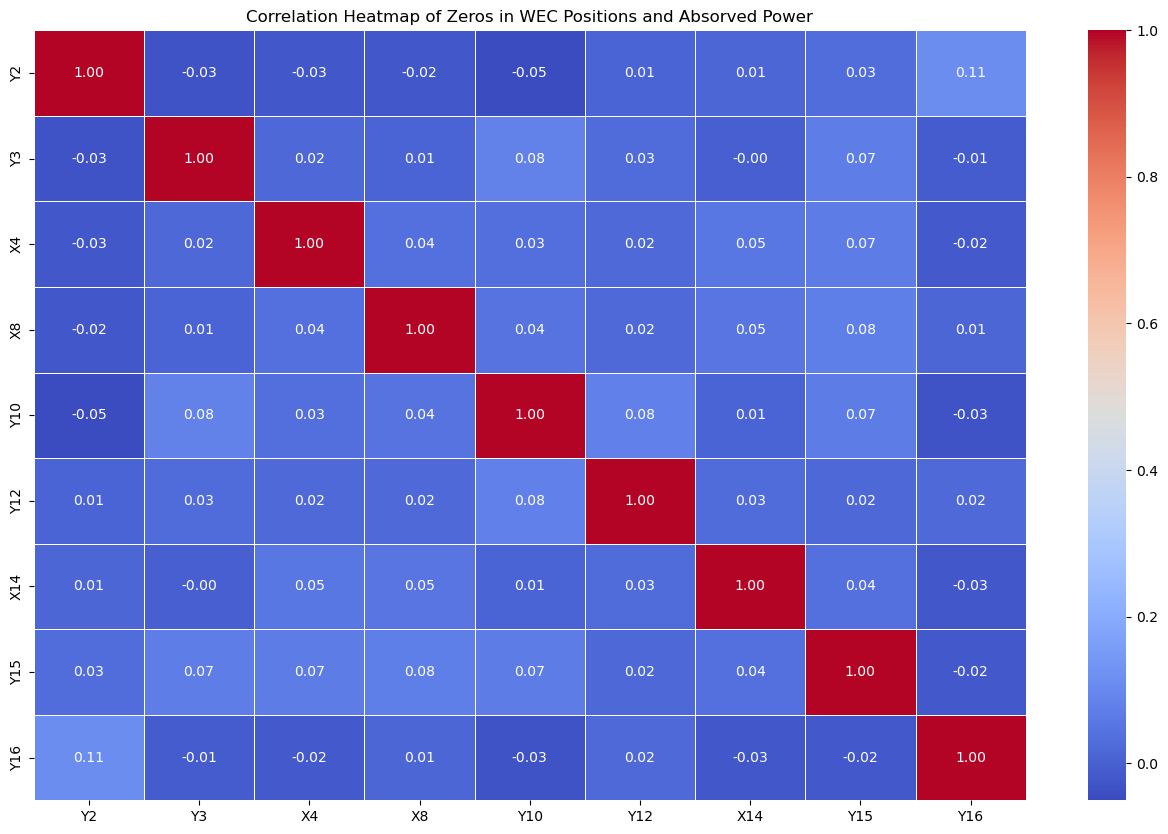

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,annot_kws={'size':10},fmt='.2f')
plt.title('Correlation Heatmap of Zeros in WEC Positions and Absorved Power')
plt.show()

1. If zeros in one feature have high correlation with another feature, it could indicate that the zeros are systematic and represent a real pattern. In such cases, they may be valid data points that highlight dependencies between variables.
2. But, here we can see that, most correlations are close to zero, suggesting that zeros in these features may not be related and could imply data gaps or inactive WECs rather than meaningful values.
3. Most likely, zeros are missing or inactive data. Imputation is recommended based on the low correlations in the heatmap.
4. We Perform sensitivity analysis to confirm the impact of imputing zeros on model performance.

#### We use K-Nearest Neighbors (KNN) Imputation:
1. It captures the **spatial relationships** between WEC positions, making the imputed values more realistic.
2. It is especially useful for maintaining the **geometric structure** of the data, which is crucial for accurately reflecting WEC placements.
3. It is more context-sensitive than simple interpolation or mean imputation, making it more suitable for modeling spatial dynamics.

In [17]:
df_with_knn_imputed = df_imputed.copy()
df_with_knn_imputed[position_cols] = df_with_knn_imputed[position_cols].replace(0, np.nan)

In [18]:
df_with_knn_imputed.isnull().sum()

X1          2538
Y1          2678
X2          2454
Y2          5295
X3          2756
Y3          4617
X4          3639
Y4          2018
X5          3132
Y5          2725
X6          2174
Y6          3233
X7          2805
Y7          2716
X8          3908
Y8          2396
X9          2466
Y9          2156
X10         3266
Y10         4339
X11         3036
Y11         1799
X12         2037
Y12         3659
X13         3078
Y13         2932
X14         4019
Y14         2254
X15         3409
Y15         3673
X16         2623
Y16         4649
P1             0
P2             0
P3             0
P4             0
P5             0
P6             0
P7             0
P8             0
P9             0
P10            0
P11            0
P12            0
P13            0
P14            0
P15            0
P16            0
Powerall       0
dtype: int64

In [19]:
knn_imputer = KNNImputer(n_neighbors=3)
df_with_knn_imputed[position_cols] = knn_imputer.fit_transform(df_with_knn_imputed[position_cols])

In [20]:
df_with_knn_imputed.isnull().sum()

X1          0
Y1          0
X2          0
Y2          0
X3          0
Y3          0
X4          0
Y4          0
X5          0
Y5          0
X6          0
Y6          0
X7          0
Y7          0
X8          0
Y8          0
X9          0
Y9          0
X10         0
Y10         0
X11         0
Y11         0
X12         0
Y12         0
X13         0
Y13         0
X14         0
Y14         0
X15         0
Y15         0
X16         0
Y16         0
P1          0
P2          0
P3          0
P4          0
P5          0
P6          0
P7          0
P8          0
P9          0
P10         0
P11         0
P12         0
P13         0
P14         0
P15         0
P16         0
Powerall    0
dtype: int64

#### Step 4: Outlier Detection using IQR with Boxplot
##### Visualize outliers using boxplot

In [21]:
df_with_knn_imputed.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,289.003708,287.270421,301.538820,272.678752,298.291344,255.327069,260.456635,329.759094,288.671660,296.359505,...,88436.333211,88332.376094,87564.405140,88660.705553,88425.310961,87185.195407,87704.411538,89190.596075,88471.104224,1.410073e+06
std,172.451661,171.623573,175.865982,188.786192,172.666821,185.784312,172.532438,171.595611,184.315503,171.449309,...,10108.410729,10156.515305,10174.365676,10515.658246,10489.753549,10565.303576,10429.253255,10442.056713,10572.335945,5.600730e+04
min,0.000500,0.003900,0.030100,0.005400,0.011100,0.009200,0.007600,0.001100,0.008500,0.006100,...,51444.747000,51304.021600,49409.891500,49814.045300,51660.410600,50205.352800,51141.599700,50628.552800,47273.983600,1.191378e+06
25%,132.559900,125.917400,131.089500,93.763700,138.319600,80.803850,103.403267,178.920850,120.934900,143.944950,...,81446.123450,81104.056800,80548.326050,80803.453350,80789.637250,79084.084350,79921.040100,81584.298250,80400.874300,1.371208e+06
50%,291.330600,288.615100,321.047800,256.321700,291.937300,226.274200,242.361100,359.813100,277.538000,294.756500,...,90309.186400,90081.495800,88073.323800,91008.125500,89940.028200,87662.619600,89002.929600,92110.485300,90696.234900,1.402170e+06
75%,438.569800,444.868350,455.764950,445.679700,460.776750,434.199450,409.886800,482.164450,464.998600,449.431700,...,97418.509600,97448.077500,97336.018200,97813.297150,97720.383600,97475.695250,97501.239150,98072.920750,97662.897300,1.446064e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,105790.374500,105526.299600,105420.107400,105395.279300,105539.986600,105447.760000,105301.202500,104602.318800,105390.327100,1.583052e+06


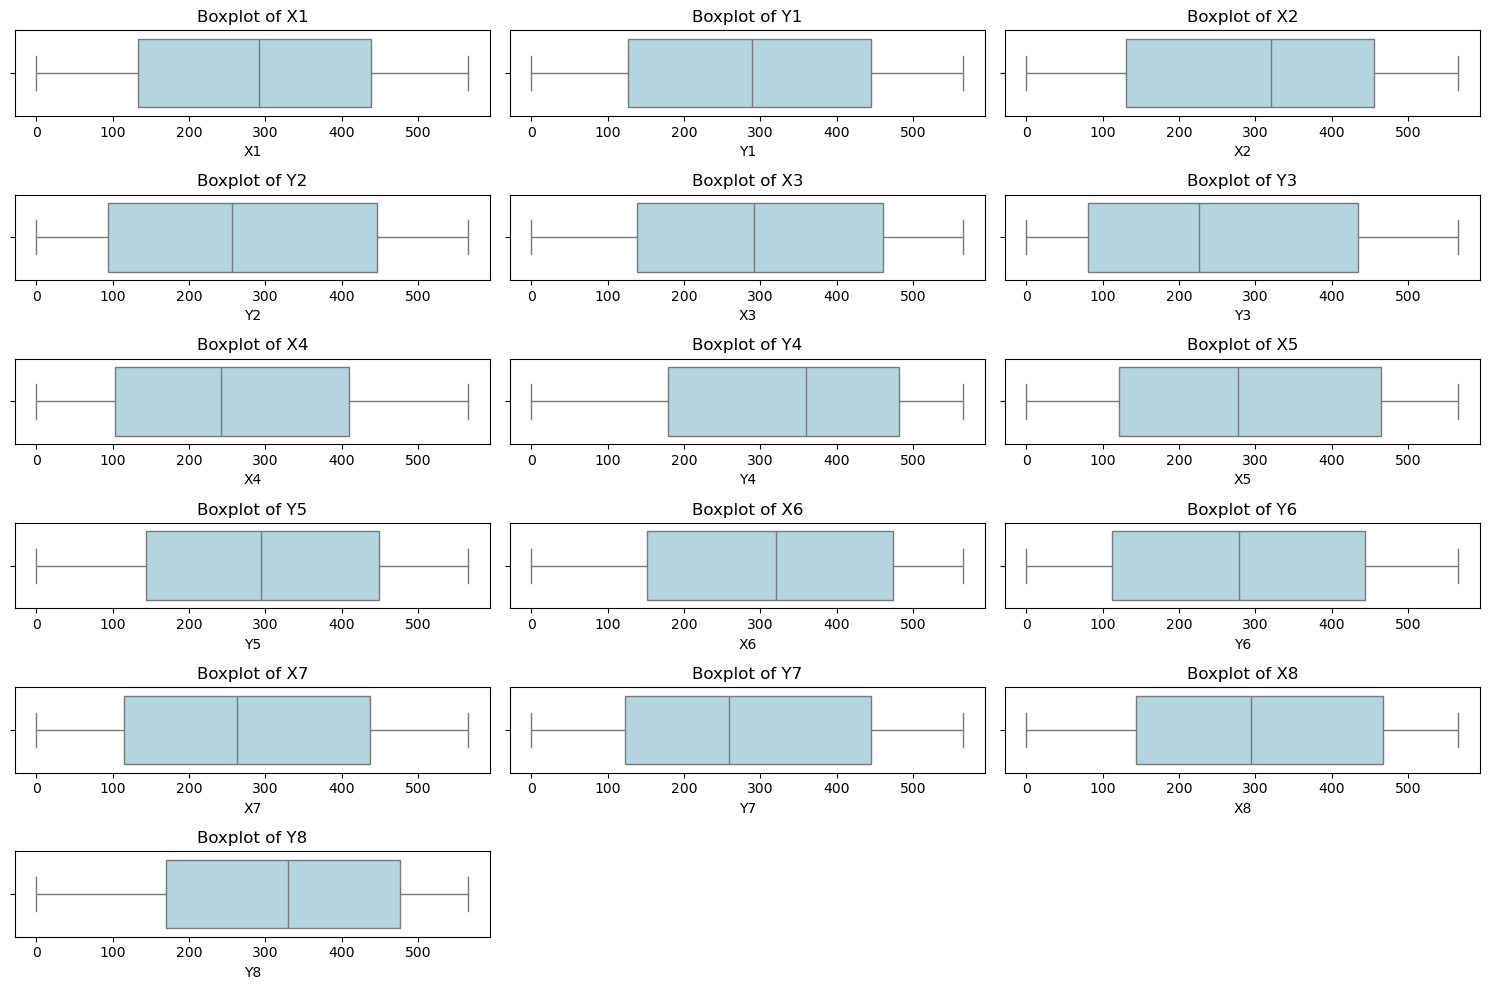

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(position_cols[:16], 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df_with_knn_imputed[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

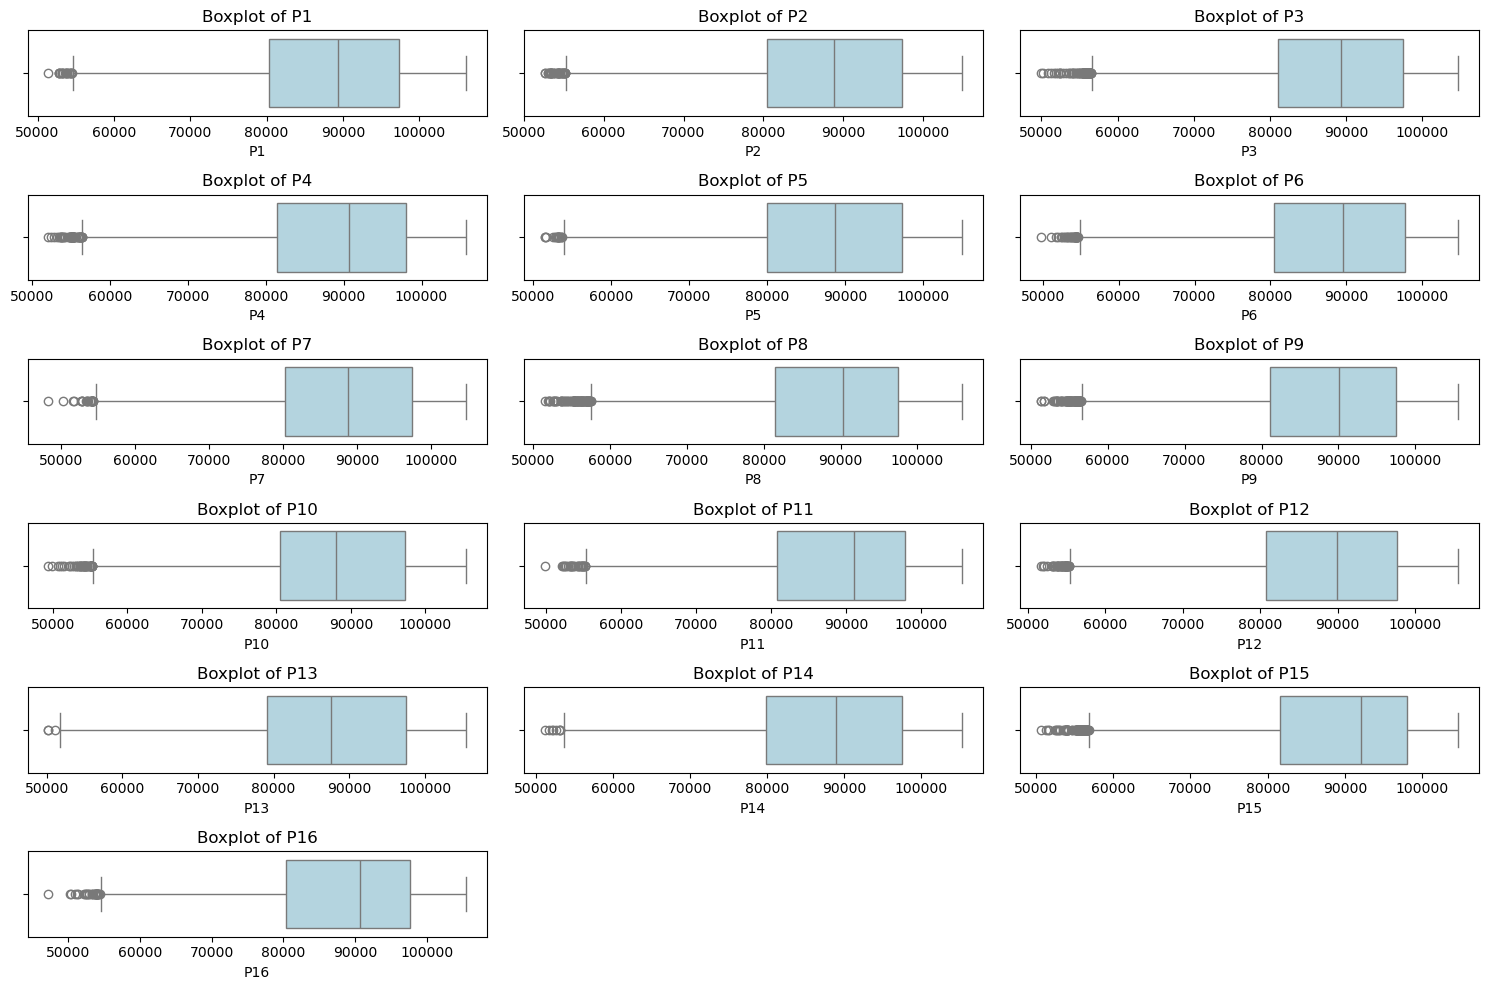

In [23]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(power_cols[:16], 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df_with_knn_imputed[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [24]:
#Detecting Outliers using IQR
outliers_iqr = pd.DataFrame()

columns_to_check = position_cols + power_cols

for col in columns_to_check:
    Q1 = df_with_knn_imputed[col].quantile(0.25)
    Q3 = df_with_knn_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_iqr[col] = ((df_with_knn_imputed[col] < lower_bound) | (df_with_knn_imputed[col] > upper_bound))

# Count the number of outliers
total_outliers = outliers_iqr.sum().sum()
outlier_percentage = (total_outliers / df_with_knn_imputed[columns_to_check].size) * 100
print(f"Total Outliers: {total_outliers}, Outlier Percentage: {outlier_percentage:.2f}%")

Total Outliers: 649, Outlier Percentage: 0.02%


#### Step 5: Handling Outliers

In [25]:
if outlier_percentage < 5:
    # Remove outliers if below 5%
    df_no_outliers = df_with_knn_imputed[~outliers_iqr.any(axis=1)]
else:
    # Replace outliers with mean of Q3 and Q1 if above 5%
    for col in columns_to_check:
        Q1 = df_with_knn_imputed[col].quantile(0.25)
        Q3 = df_with_knn_imputed[col].quantile(0.75)
        mean_mid = (Q3 + Q1) / 2

        # Replace outliers
        df_with_knn_imputed[col] = np.where(outliers_iqr[col], mean_mid, df_with_knn_imputed[col])

In [26]:
# After handling outliers, set df_no_outliers as the main data if outliers were removed, 
# else use df_with_knn_imputed

df_final = df_no_outliers if outlier_percentage < 5 else df_with_knn_imputed

In [27]:
df_final.shape

(71380, 49)

In [28]:
df_final.isnull().sum()

X1          0
Y1          0
X2          0
Y2          0
X3          0
Y3          0
X4          0
Y4          0
X5          0
Y5          0
X6          0
Y6          0
X7          0
Y7          0
X8          0
Y8          0
X9          0
Y9          0
X10         0
Y10         0
X11         0
Y11         0
X12         0
Y12         0
X13         0
Y13         0
X14         0
Y14         0
X15         0
Y15         0
X16         0
Y16         0
P1          0
P2          0
P3          0
P4          0
P5          0
P6          0
P7          0
P8          0
P9          0
P10         0
P11         0
P12         0
P13         0
P14         0
P15         0
P16         0
Powerall    0
dtype: int64

In [29]:
df_final.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
count,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,...,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,71380.000000,7.138000e+04
mean,289.076152,287.428079,301.952961,272.622966,298.405284,255.160514,260.364649,330.201101,288.860790,296.660878,...,88503.942895,88396.295838,87624.246823,88715.854304,88485.699568,87212.060151,87745.963684,89276.348943,88529.570421,1.410949e+06
std,172.535852,171.634651,175.890907,188.948534,172.693774,185.914548,172.563495,171.507415,184.384754,171.495702,...,10028.910846,10082.284251,10110.889138,10470.233950,10433.505491,10542.871563,10396.892233,10356.355490,10523.524547,5.535713e+04
min,0.000500,0.003900,0.030100,0.005400,0.011100,0.009200,0.007600,0.001100,0.008500,0.006100,...,57488.375600,56633.867900,55429.196000,55299.397800,55413.468000,52112.183400,53662.717800,56888.535000,54525.519100,1.204878e+06
25%,132.426200,125.957625,131.459400,93.401900,138.380900,80.623383,103.206875,179.430017,120.934900,144.132825,...,81523.050375,81187.397425,80632.943125,80865.114025,80867.796775,79116.353125,79962.105425,81692.493525,80473.961250,1.372127e+06
50%,291.383050,288.941750,321.888250,256.247550,292.044500,226.274200,242.104883,360.340950,277.716550,295.212250,...,90359.824850,90148.211650,88109.500600,91080.533200,90000.209250,87673.494950,89038.132000,92213.063300,90767.584200,1.402696e+06
75%,438.806025,445.085250,455.996750,445.724875,460.978600,434.263000,409.909425,482.621758,465.285100,449.779100,...,97421.579300,97452.200275,97343.324700,97821.807450,97730.894625,97481.291350,97506.237250,98084.390050,97671.498825,1.446674e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,105790.374500,105526.299600,105420.107400,105395.279300,105539.986600,105447.760000,105301.202500,104602.318800,105390.327100,1.583052e+06


### Step 6: EDA
#### 6.1. Visualization of Final Dataset Comparison

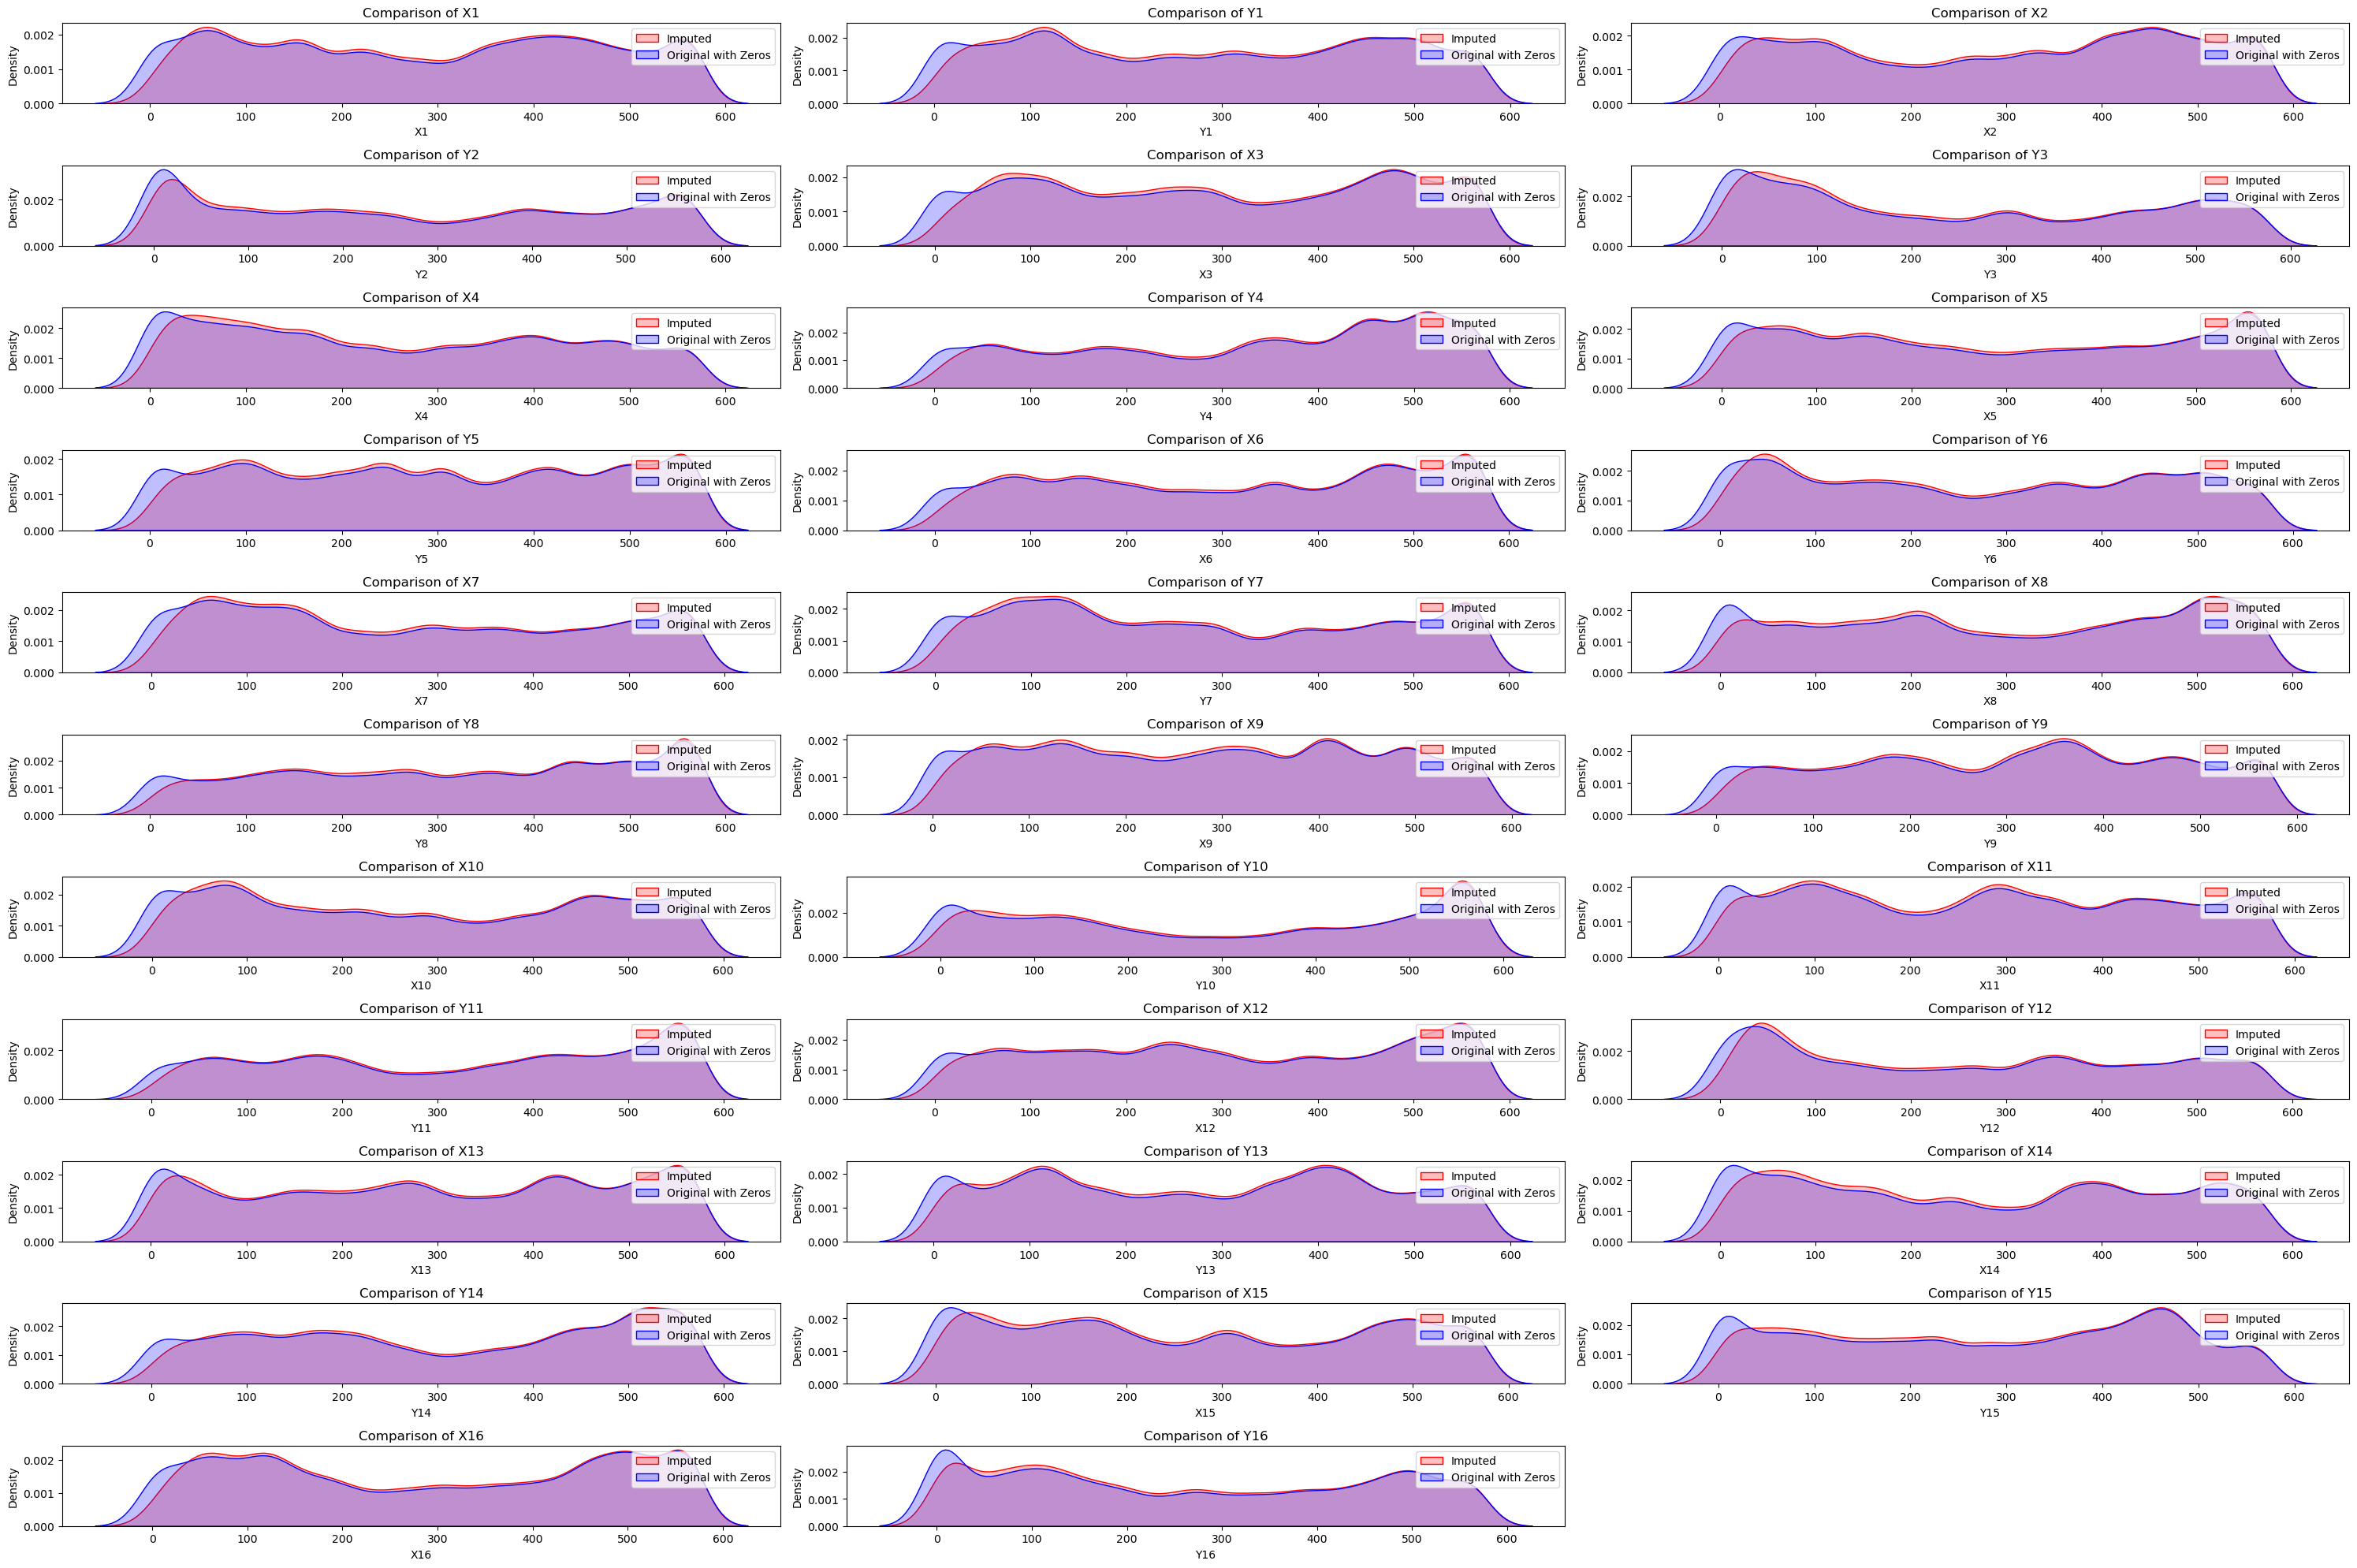

In [30]:

plt.figure(figsize=(30, 20))
for i, col in enumerate(position_cols, 1):
    plt.subplot(11, 3, i)
    sns.kdeplot(df_final[col], label='Imputed', color='red', fill=True)
    sns.kdeplot(df_imputed[col], label='Original with Zeros', color='blue', fill=True)
    plt.title(f'Comparison of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

**Impact of Zero Values:**
1. In the original dataset with zeros (blue), there’s a higher density around zero for some features, visible as a spike near zero.
2. The KNN-imputed dataset smooths out these spikes by replacing zeros with estimated values based on nearby data points. This results in a more continuous and evenly distributed density without abrupt peaks near zero.
3. This indicates that if zeros represent missing or inactive data, KNN imputation might provide a more realistic distribution by filling those gaps.

#### 6.2 Correlation Heatmap

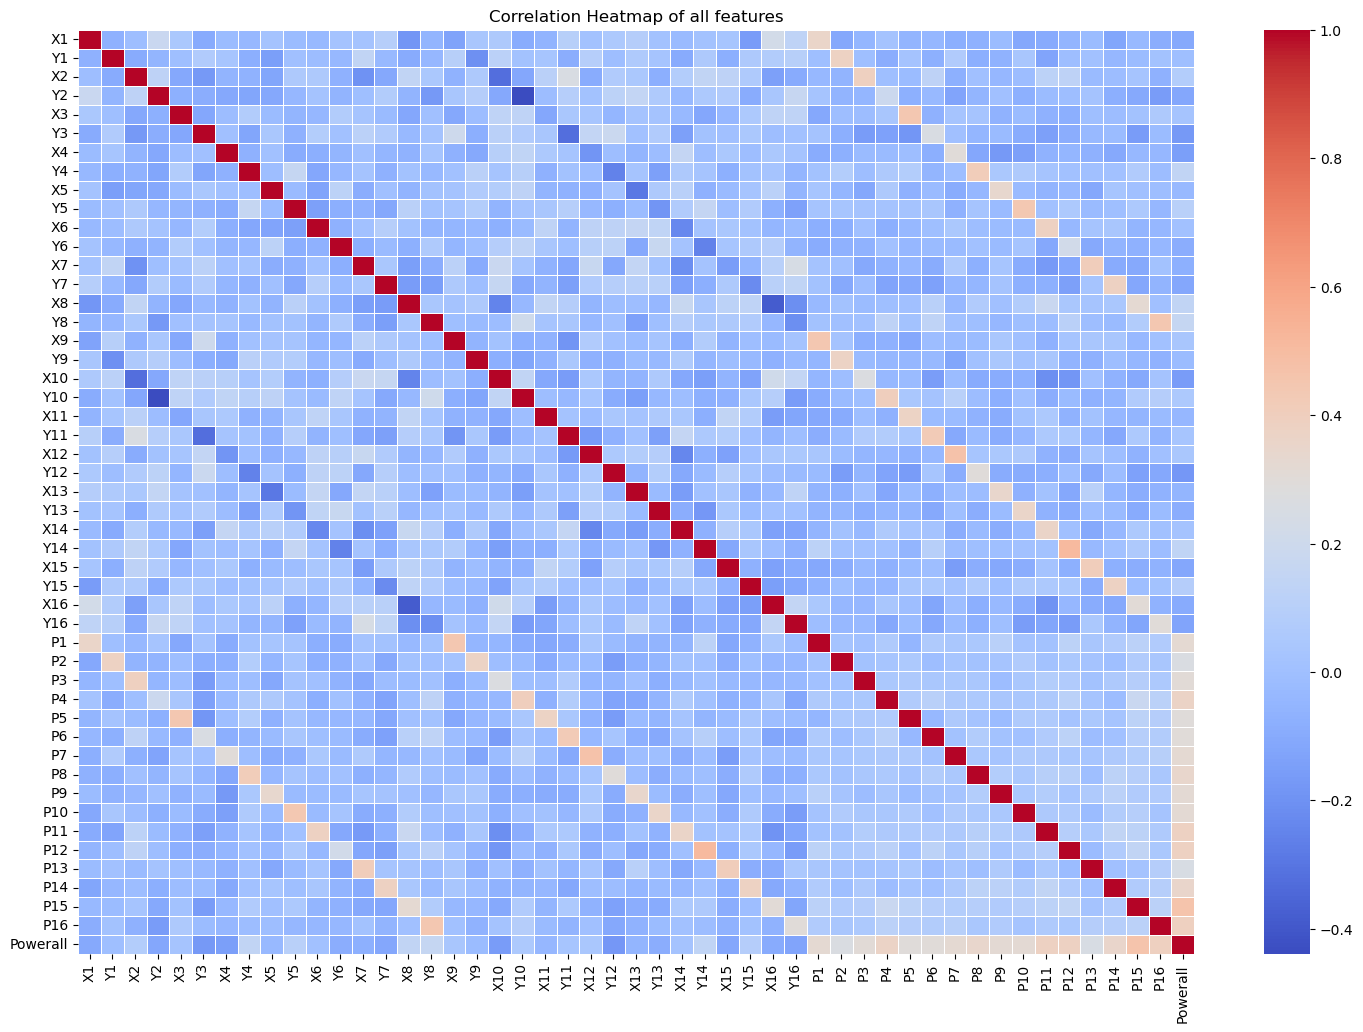

In [31]:
plt.figure(figsize=(18,12))
corr_matrix= df_final.corr()
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm',linewidths=0.5,cbar=True)
plt.title('Correlation Heatmap of all features')
plt.show()

In [32]:
# Extract highly correlated pairs (with correlation coefficient > 0.70)

correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j]) > 0.7) :
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            print(f"Highly correlated pair: {corr_matrix.columns[j]} - {colname} (Correlation: {corr_matrix.iloc[i, j]:.2f})")

#Check if the set of correlated features is empty
if not correlated_features:
    print("No features with correlation coefficient greater than 0.7 were found.")
else:
    print(f"Features with high correlation (> 0.7): {correlated_features}")

No features with correlation coefficient greater than 0.7 were found.


**Since no pairs of features had a correlation coefficient above 0.7, we can conclude:**

1. **Minimal Feature Redundancy:** The lack of highly correlated features suggests that each feature adds unique information to the dataset. This is beneficial as it implies that we do not need to remove or combine features due to multicollinearity.
2. **Multivariate Influence on Target:** Since no strong correlations were found between features and the target (Powerall), it indicates that Powerall may be influenced by a combination of features rather than a single dominant feature.

#### 6.3 Distribution Analysis and Skewness Check

In [33]:
df_pre_transform = df_final.copy()

In [34]:
# Identify skewed features before transformation
skewed_features = []
for col in power_cols:
    original_skewness = skew(df_pre_transform[col])
    if abs(original_skewness) > 0.5:
        skewed_features.append(col)
        print(f"Original skewness of {col}: {original_skewness:.2f}")

Original skewness of P1: -0.59
Original skewness of P2: -0.57
Original skewness of P3: -0.63
Original skewness of P4: -0.68
Original skewness of P5: -0.57
Original skewness of P6: -0.58
Original skewness of P7: -0.57
Original skewness of P8: -0.67
Original skewness of P9: -0.63
Original skewness of P10: -0.54
Original skewness of P11: -0.68
Original skewness of P12: -0.62
Original skewness of P14: -0.56
Original skewness of P15: -0.75
Original skewness of P16: -0.66


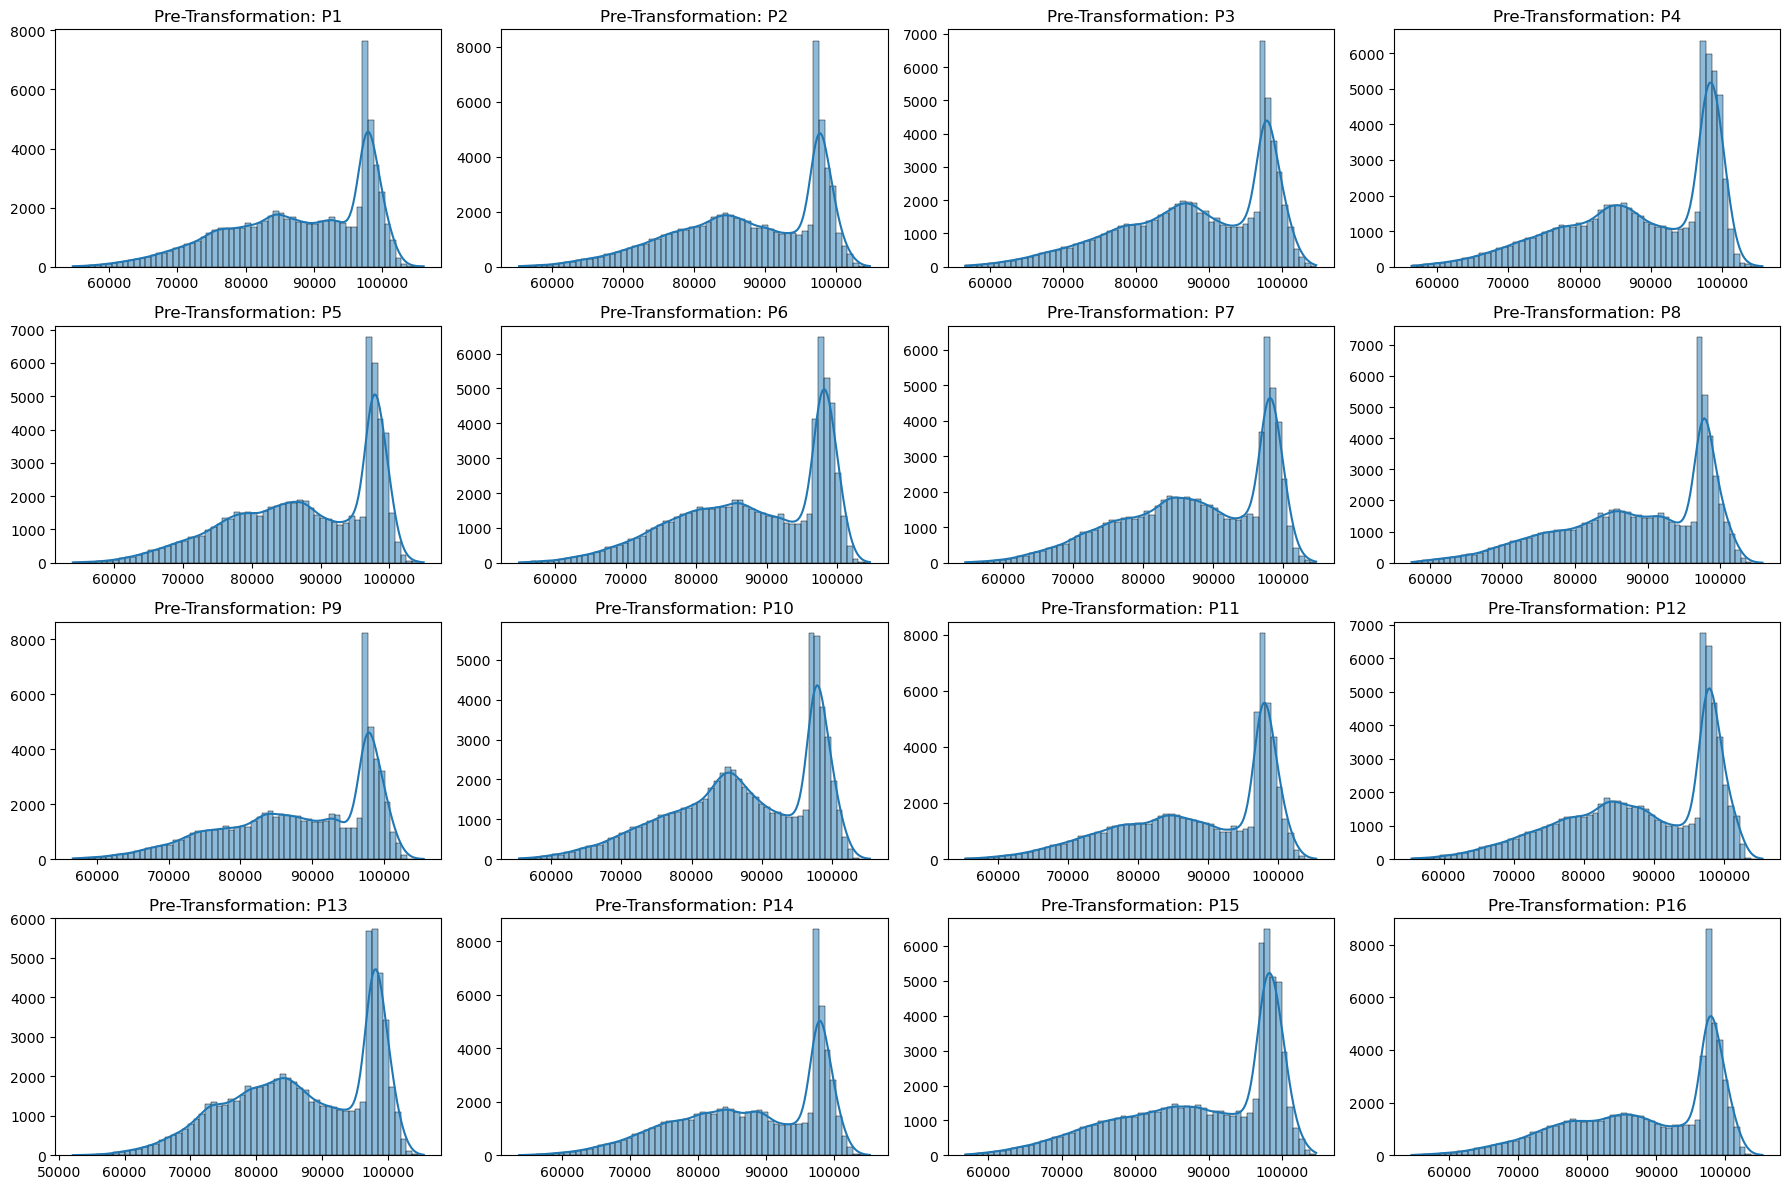

In [35]:
# Plot distributions before transformation
plt.figure(figsize=(18, 12))
for i, col in enumerate(power_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_pre_transform[col], kde=True)
    plt.title(f'Pre-Transformation: {col}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df_pre_transform[skewed_features] = transformer.fit_transform(df_pre_transform[skewed_features])

# Verify the transformation by rechecking skewness after Yeo-Johnson transformation
for col in skewed_features:
    new_skewness = skew(df_pre_transform[col])
    print(f"New skewness of {col}: {new_skewness:.2f}")

New skewness of P1: -0.18
New skewness of P2: -0.17
New skewness of P3: -0.18
New skewness of P4: -0.23
New skewness of P5: -0.18
New skewness of P6: -0.19
New skewness of P7: -0.18
New skewness of P8: -0.20
New skewness of P9: -0.20
New skewness of P10: -0.15
New skewness of P11: -0.24
New skewness of P12: -0.21
New skewness of P14: -0.18
New skewness of P15: -0.27
New skewness of P16: -0.23


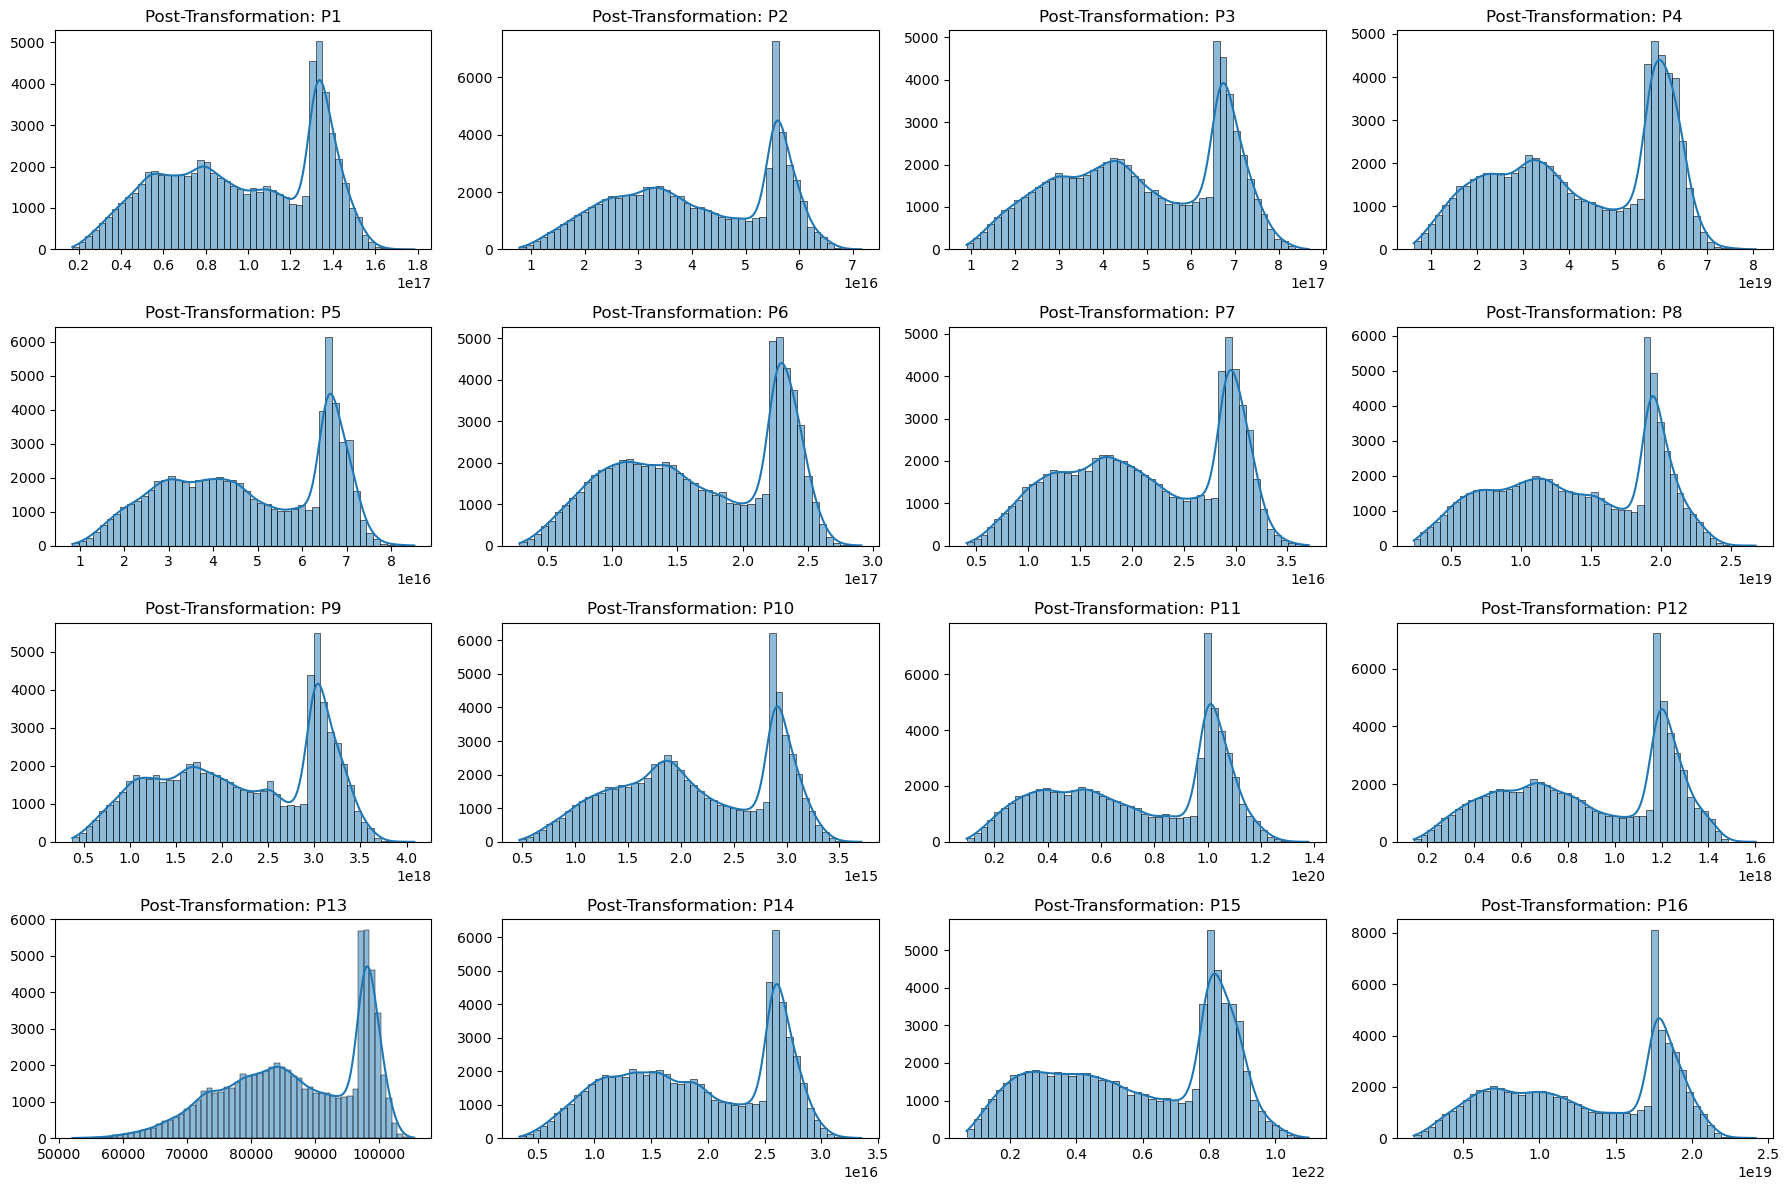

In [37]:
# Plot distributions after transformation
plt.figure(figsize=(18, 12))
for i, col in enumerate(power_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_pre_transform[col], kde=True)
    plt.title(f'Post-Transformation: {col}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Skewness Handling Summary**
To improve the symmetry of feature distributions, we applied a Yeo-Johnson transformation to features with skewness above ±0.5. This transformation was selected because it can handle both positive and negative values, making it suitable for our dataset, which includes features with mixed signs.

**Before Transformation:**
1. The original skewness values indicated moderate skewness across multiple power features, with values such as:
2. P1: -0.59, P2: -0.57, P3: -0.63, P4: -0.68, and similarly skewed distributions for other features up to P16.
These moderate skewness values suggest that the data was not perfectly symmetrical, which could affect model performance, especially for models sensitive to feature distribution.

**After transformation:**
1. Skewness values of the targeted features were significantly reduced. For example, features like P1, P2, and P15 now exhibit skewness values closer to zero (e.g., P1 has a skewness of -0.14, P15 has a skewness of -0.20), indicating a more symmetrical distribution.
2. This adjustment aligns feature distributions more closely with normality, which is beneficial for models sensitive to feature distribution, such as linear regression.

In conclusion, handling skewness for features with a threshold of ±0.5 successfully stabilized variances across the dataset. This transformation helps make the data more suitable for predictive modeling and may contribute to improved model accuracy and interpretability in subsequent steps.

#### Step 7: Save Final Cleaned Dataset to CSV

In [38]:
# Check for missing values
missing_values = df_pre_transform.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Check final skewness values for targeted features
print("\nFinal skewness of targeted features after transformation:")
for col in power_cols:
    skewness = skew(df_pre_transform[col])
    print(f"{col}: {skewness:.2f}")

# Check data types of each column
print("\nData types of each column:\n", df_pre_transform.dtypes)

# Check for outliers with summary statistics
print("\nSummary statistics for final data:\n", df_pre_transform.describe())

# Check the shape of the final dataset
print("\nFinal dataset shape:", df_pre_transform.shape)

Missing values in each column:
 Series([], dtype: int64)

Final skewness of targeted features after transformation:
P1: -0.18
P2: -0.17
P3: -0.18
P4: -0.23
P5: -0.18
P6: -0.19
P7: -0.18
P8: -0.20
P9: -0.20
P10: -0.15
P11: -0.24
P12: -0.21
P13: -0.43
P14: -0.18
P15: -0.27
P16: -0.23

Data types of each column:
 X1          float64
Y1          float64
X2          float64
Y2          float64
X3          float64
Y3          float64
X4          float64
Y4          float64
X5          float64
Y5          float64
X6          float64
Y6          float64
X7          float64
Y7          float64
X8          float64
Y8          float64
X9          float64
Y9          float64
X10         float64
Y10         float64
X11         float64
Y11         float64
X12         float64
Y12         float64
X13         float64
Y13         float64
X14         float64
Y14         float64
X15         float64
Y15         float64
X16         float64
Y16         float64
P1          float64
P2          float64
P3      

In [39]:
df_final.to_csv('Group_14_Clean_Data.csv', index=False)
print("Final cleaned dataset saved to 'Group_14_Clean_Data.csv'.")

Final cleaned dataset saved to 'Group_14_Clean_Data.csv'.


**Note on Data Preprocessing**:: 
In the data preprocessing stage, we applied a rigorous cleaning process to prepare the dataset for modeling. This included 
1. Handling missing values,
2. Analyzing and imputing zeros,
3. Detecting and managing outliers, and
4. Scaling the data for consistency.

Given the uncertainty around the significance of zero values in the WEC positions, we decided to treat these zeros as missing values and imputed them using KNN imputation. This approach ensures that the dataset remains complete and avoids potential misinterpretation of zero values as valid data points.

Outliers in the data were carefully managed to maintain consistency without compromising the dataset's overall structure. 

Finally, all features were scaled to support balanced and unbiased model training. The imputed and scaled dataset is now prepared for the next stages of analysis, with confidence that it accurately represents the underlying data while minimizing the risk of inconsistencies.

This dataset will serve as the foundation for model training and further analysis, ensuring robust and reliable results in subsequent steps.